# Sports Image Classification
>By: Patrick Ryan


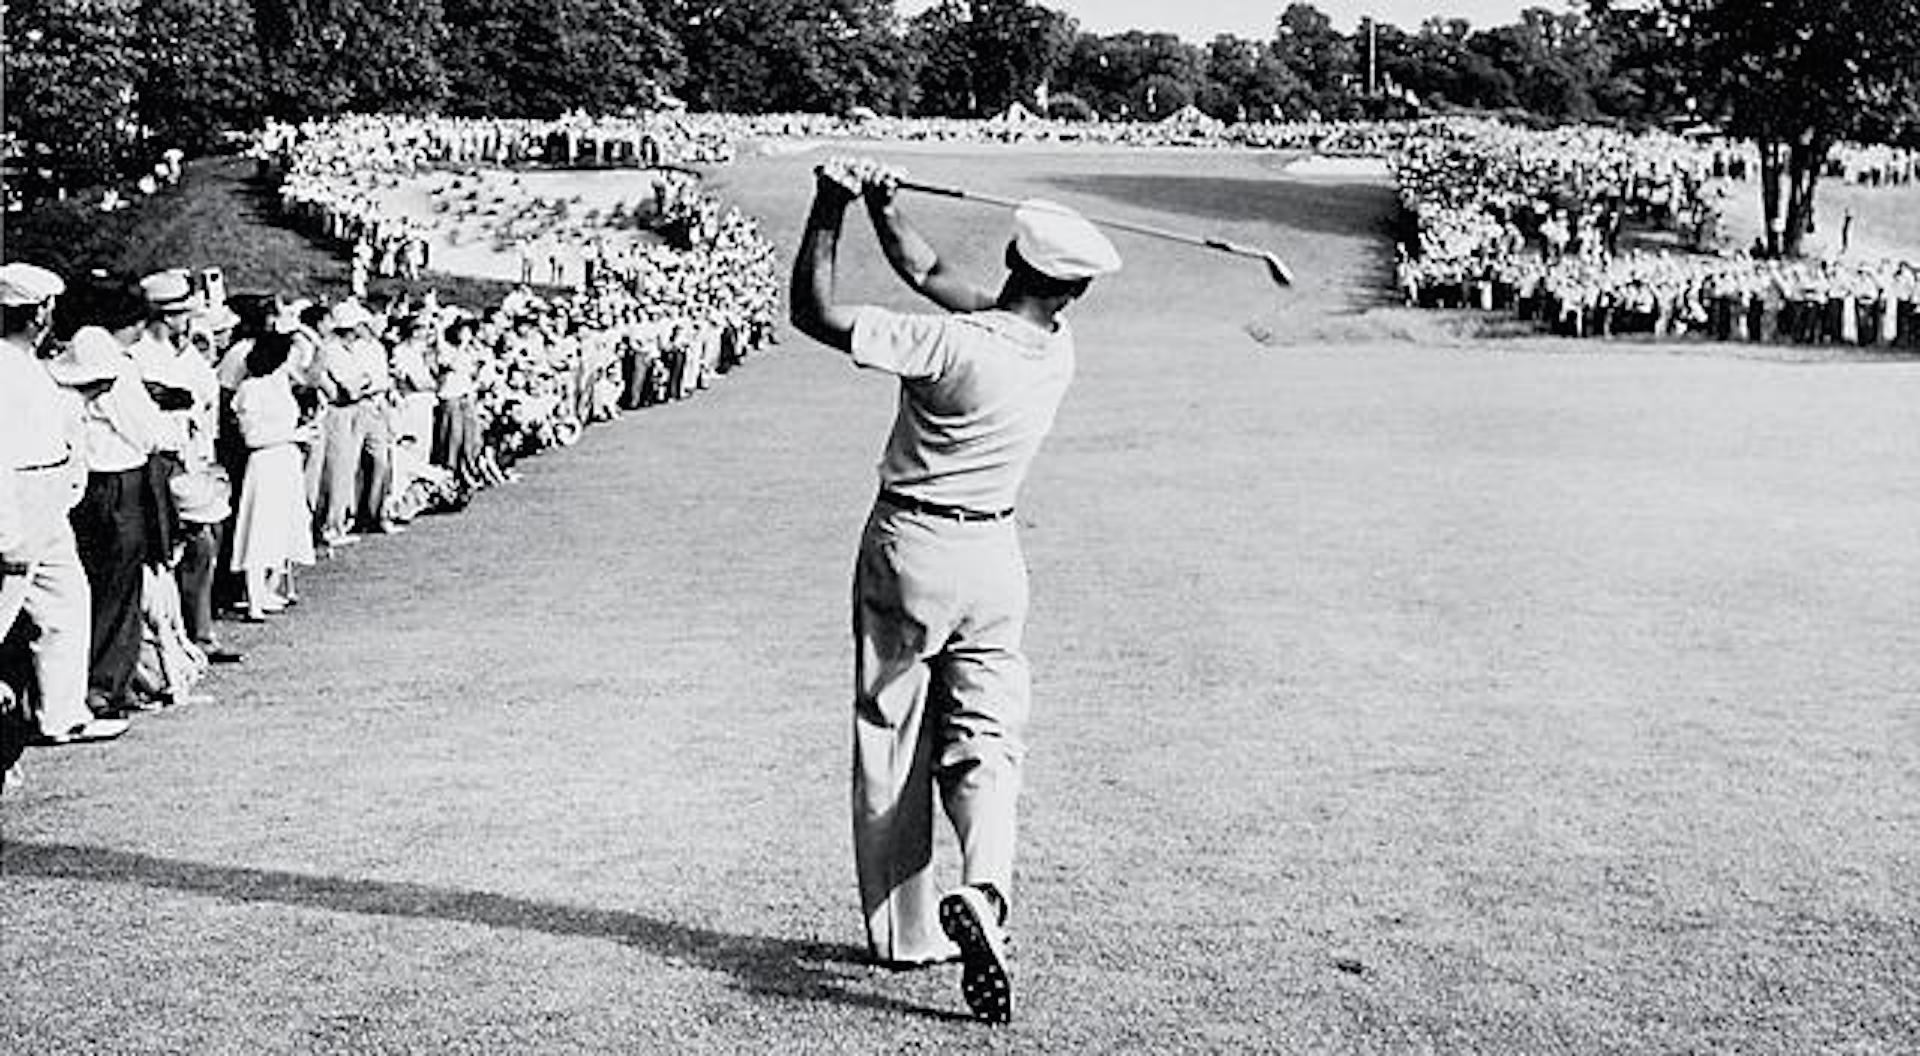

# <ins>Summary</ins>

## Busines and Data Understanding
This notebook will explore a variety of images from different sports. The reason for this exploration is to try and classify which sport is which through the images provided. The data set includes 7 different categories to classify. Some examples of those categories are:
> 1. badminton
2. baseball
3. basketball
4. boxing


Between those categories there are 4772 images to be classified. The data will be split into a training set and a validation set to test the model. The source of the data can be found in this <a href=https://github.com/jurjsorinliviu/Sports-Type-Classifier>GitHub repository.</a>

## Data Preparation
The first step in preparing the data will be exploration. I want to check out what some of the images look like. I want to know if I have enough data to train and test the model. Plus I want to make sure I have enough images in a format I can actually use. After this initial exploration it will be time to create a dataset with all of the images. After creating the dataset I will split the data up. In this case I will use 80% of the images for training, and 20% for validation. Some of the libraries I will be using for data preparation are:
> 1. matplotlib.pyplot for data visualization.
2. numpy for handling different arrays.
3. pathlib import Path - This module offers classes representing filesystem paths with semantics appropriate for different operating systems (<a href=https://docs.python.org/3/library/pathlib.html#basic-use>info found here)</a>.
4. pandas to handle the data.
5. ImageDataGenerator from the tensorflow.keras.processing.image library that randomly applied defined parameters to the train set.


Keras and Tensorflow provide high-level APIs used for easily building and training models.

## Modeling
I chose a convolutional neural network (CNN) model for this image data set. The idea behind that was that a local understanding of an image is good enough. The practical benefit is that having fewer parameters greatly improves the time it takes to learn as well as reduces the amount of data required to train the model. The libraries and imports I used for modeling were:

1. From the tensorflow.keras.models library Sequential is imported for CNN modeling.
2. To build the CNN architecture this notebook used tensorflow.keras.layers library which included:
 - Dense – operates on the input and returns the output.
 - Conv2D – 2D convolution layer.
 - Maxpoolin2D – down samples the input along its spatial dimensions.


In terms of tuning steps I chose to use EarlyStopping to help avoid overfitting the model. I also assigned weight classes because it emphasizes the weight of the minority class in order for the model to learn from all classes equally.

## Evaluation
The final model upon inspection performed satisfactory. The way it was evaluated was with an accuracy score. An accuracy score in this instance is a metric that explains how well the model is at predicting each class of image. The score is the fraction of predictions my model got right. The actual accuracy score in this case is a 72%. This tells me that 72/100 times I am identifying the right class of image.

# Beginning of Examination

## Initial Data Exploration/Preparation
The data comes from a repository on GitHub that can be found <a href=https://github.com/jurjsorinliviu/Sports-Type-Classifier>here.</a>
- This data is composed of 23 different classes of sport images. Seven of these 23 will be chosen to classify. The main reason behind this decision was that some of the files did not work. The format they were in was not compatible with this project.
- I will use the library pathlib in order to load up the data.
- There are two types of paths in pathlib:
>1. Relative path: The path relative to the folder we are currently working in.
 2. Absolute path: The path that is relative to the operating system (this is the one I am working with).
- There is a minor limit to the data. The images are of different aspects of the sport. For example, just a picture of a ball. Not necessarily the people playing with it.
- Importing relevant libraries to operate on the data.

## Importing Relevant Libraries

In [1]:
import matplotlib.pyplot as plt #Library for creating static, animated, and interactive visualizations (graphs).
import numpy as np #Fundamental package for scientific computing.
import os #Allows functions to interact with the operating system.
import PIL #Image processing.
import tensorflow as tf #Training and inference of the deep neural network.

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## Download the Data
- How many images are there?
- Exploring a few images to see that we are loading up the right things.
- It doesn't do us any good to use data if it isn't the right data.
- Always good to measure twice and cut once.

In [33]:
import pathlib #Creates a path object.
data_dir = pathlib.Path('data_1/')
# data = 'data_1/'

In [34]:
# How many image classification categories.
len(['badminton', 'baseball', 'basketball', 'boxing', 'cricket', 'football', 'ice_hockey'])

7

In [35]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

4312


### Exploring Some of the Images
- Loading up a couple of selections.
- What do the images look like?

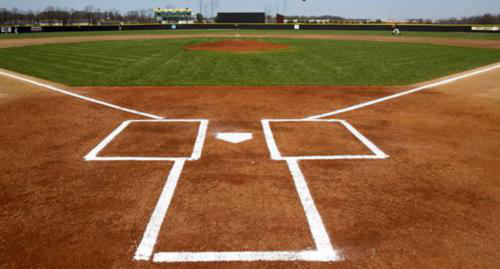

In [36]:
# Turning the data into a list so that it can be explored.
baseball = list(data_dir.glob('baseball/*'))
# Plotting the 11th image from the baseball file.
PIL.Image.open(str(baseball[10])) 

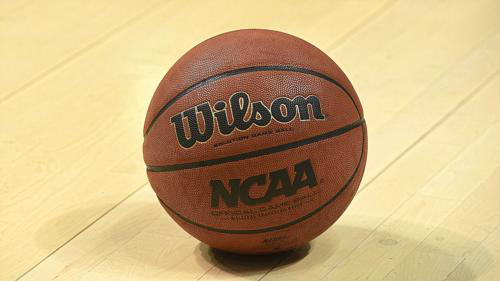

In [37]:
basketball = list(data_dir.glob('basketball/*'))
# Checking out the second picture in the basketball data.
PIL.Image.open(str(basketball[1]))

## Parameters
- Preparing some parameters for the loader.
- The batch refers to the number of training examples utilized in one iteration.
- The dimension of the images we are going to define are 180x180.
- A lower dimension size with greater batch size is one of the options to try.

In [38]:
batch_size = 32
img_height = 180
img_width = 180

## Creating a Dataset
- Let's load these images off disk using the helpful tf.keras.utils.image_dataset_from_directory utility. 
- This will take you from a directory of images on disk to a tf.data.Dataset in just a couple lines of code.
- It's good practice to use a validation split when developing your model. I will use 80% of the images for training, and 20% for validation.

In [39]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4772 files belonging to 7 classes.
Using 3818 files for training.
Found 4772 files belonging to 7 classes.
Using 954 files for validation.


- You can find the class names in the class_names attribute on these datasets. These correspond to the directory names in alphabetical order.

In [40]:
# Checking out the names of the classes for use in visualizing the data.
class_names = train_ds.class_names
print(class_names)

['badminton', 'baseball', 'basketball', 'boxing', 'cricket', 'football', 'ice_hockey']


## Visualize the Data
- This is a simple preview of some of the train_ds images.
- There are nine images to preview.
- It is good to get an idea if they are being filed under the right label.
- It is good practice to see your data.

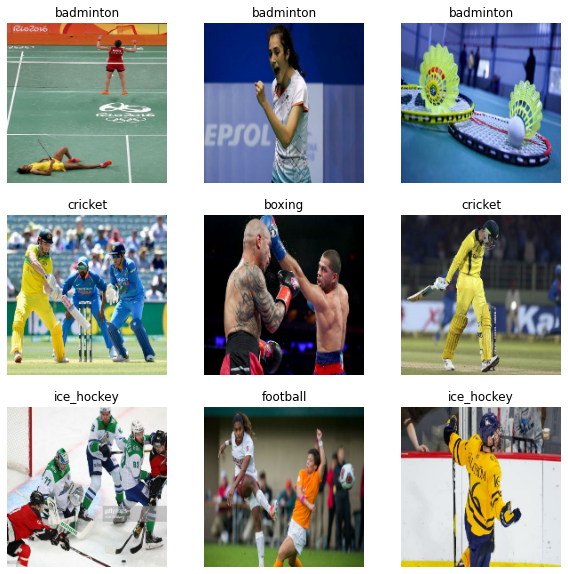

In [41]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Summary for Above  &#8593;
- If we would like at another time I can also manually iterate over the dataset and retrieve batches of images.
- The image_batch is a tensor of the shape (32, 180, 180, 3). 
- This is a batch of 32 images with a shape of 180x180x3. 
 - The last dimension refers to color channels RGB. 
- The labels_batch is a tensor of the shape (32,). These are corresponding labels to the 32 images.
#### FYI:
- You can call .numpy() on the image_batch and labels_batch tensors to convert them to a numpy.ndarray.

In [42]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


## Configure the Dataset for Performance
- I will use buffered prefetching so I can yield data from the disk without having an input or output blocking. 
- These are two important methods you should use when loading data:
 1. Dataset.cache - keeps the images in memory after they're loaded off disk during the first epoch. This will ensure the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache.
 2. Dataset.prefetch - overlaps data preprocessing and model execution while training.
(Interested readers can learn more about both methods, as well as how to cache data to disk in the Prefetching section of the Better performance with the tf.data API guide.)

In [43]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Standardize the data
- The RGB channel values are in the [0, 255] range. This is not ideal for a neural network.
- In general you should seek to make your input values small.
- I will standardize the values to be in the [0, 1] range by using tf.keras.layers.Rescaling.
- This can be done within the cnn architecture but I chose to do it outside of it so as to provide a good example.
- It is written up in the cnn architecture just hashed out.

In [44]:
normalization_layer = layers.Rescaling(1./255)

In [45]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.9998366


## CNN
- CNN architecture is based on layers of convolution.
- The convolution layers receive input and transform the data from the image and pass it as input to the next layer.
- The transformation is known as the operation of convolution.
- It is necessary to define the number of filters for each convolution layer.
- These filters detect patterns such as edges, shapes, curves, objects, textures, or even colors.
- The more sophisticated patterns or objects it detects are more deeply layered.
- The Sequential model consists of three convolution blocks (tf.keras.layers.Conv2D) with a max pooling layer (tf.keras.layers.MaxPooling2D) in each of them. 
- There's a fully-connected layer (tf.keras.layers.Dense) with 128 units on top of it that is activated by a ReLU activation function ('relu'). This model has not been tuned for high accuracy. It is just a baseline model.

## Building a Baseline Model
- Just exploring the data.
- Seeing what an initial model spits out.
- In order to view the training and validation accuracy for each training epoch I will pass the metrics argument through .compile.
- Tried out a few initializers just to see what would happen.

In [51]:
num_classes = len(class_names)

model = Sequential([
  #layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(img_height, img_width, 3)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Model Summary

In [52]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 22, 22, 64)      

## Visualizing the Model
- Link for code and model found <a href=https://towardsdatascience.com/medical-x-ray-%EF%B8%8F-image-classification-using-convolutional-neural-network-9a6d33b1c2a>in this blog</a>.

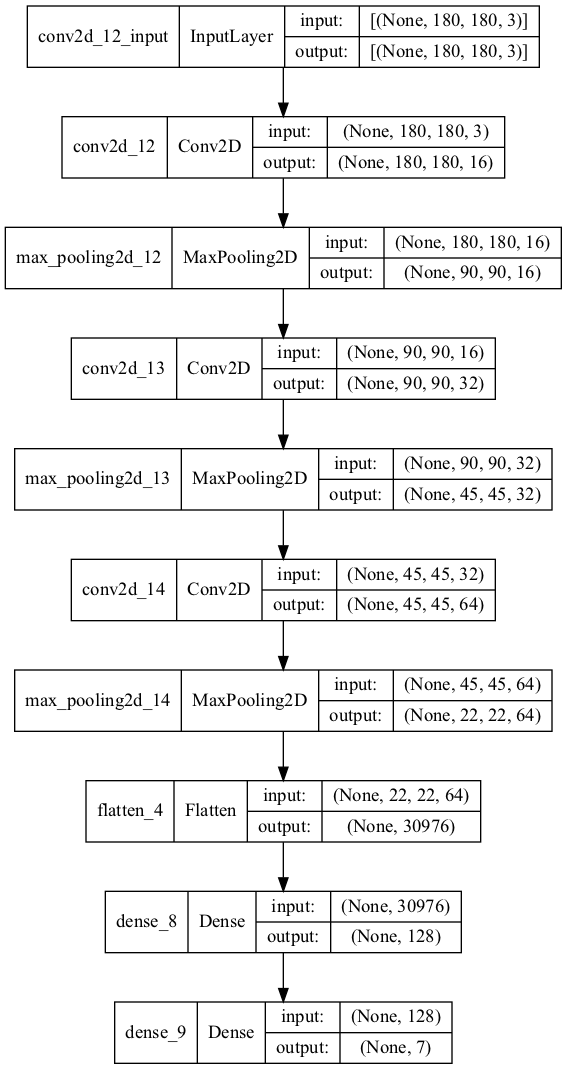

In [53]:
!pip install pydot
import graphviz
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

## Training the Model

In [54]:
epochs=5
history = model.fit(
  normalized_ds,
  validation_data=val_ds,
  epochs=epochs)

Epoch 1/5
120/120 [==============================] - 32s 267ms/step - loss: 1.3806 - accuracy: 0.4741 - val_loss: 175.3777 - val_accuracy: 0.5105
Epoch 2/5
120/120 [==============================] - 32s 267ms/step - loss: 0.8065 - accuracy: 0.7197 - val_loss: 197.1199 - val_accuracy: 0.5849
Epoch 3/5
120/120 [==============================] - 32s 267ms/step - loss: 0.5681 - accuracy: 0.7996 - val_loss: 227.9161 - val_accuracy: 0.5954
Epoch 4/5
120/120 [==============================] - 31s 261ms/step - loss: 0.3474 - accuracy: 0.8821 - val_loss: 267.6075 - val_accuracy: 0.6289
Epoch 5/5
120/120 [==============================] - 32s 262ms/step - loss: 0.1845 - accuracy: 0.9421 - val_loss: 412.6036 - val_accuracy: 0.5996


In [55]:
initial_epochs = 10
loss0, accuracy0 = model.evaluate(val_ds)

30/30 [==============================] - 2s 61ms/step - loss: 412.6036 - accuracy: 0.5996


In [56]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 412.60
initial accuracy: 0.60


## Visualize Training Results
- Let's create some plots of loss and accuracy for the training and validation sets!

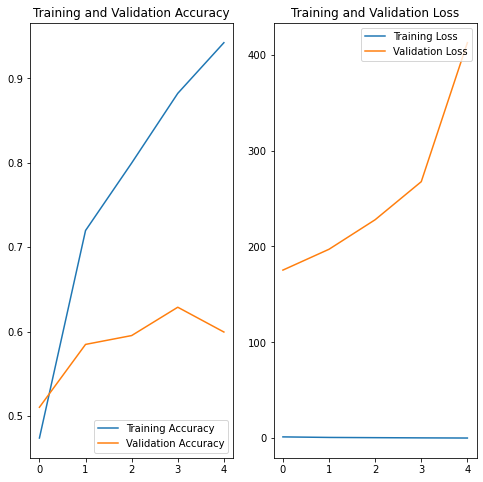

In [57]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

- The plots above show that training accuracy and validation accuracy are off by large margins, and the model has achieved only around 60% accuracy on the validation set.

- Let's inspect what went wrong and try to increase the overall performance of the model.

## Overfitting
- In the plots above, the training accuracy is increasing linearly over time, whereas validation accuracy stalls around 60% in the training process. Also, the difference in accuracy between training and validation accuracy is noticeable.

- When there are a small number of training examples, the model sometimes learns from noises or unwanted details from training examples. This can negatively impact the performance of the model on new examples. This phenomenon is known as overfitting. It means that the model will have a difficult time generalizing on a new dataset.

- There are multiple ways to fight overfitting in the training process. Going forward I will use data augmentation and add Dropout on the model.

## Data augmentation
- Overfitting generally occurs when there are a small number of training examples. Data augmentation takes the approach of generating additional training data from your existing examples by augmenting them using random transformations that yield believable-looking images. This helps expose the model to more aspects of the data and generalize better.

- I will implement data augmentation using the following Keras preprocessing layers: 
 1. tf.keras.layers.RandomFlip 
 2. tf.keras.layers.RandomRotation
 3. tf.keras.layers.RandomZoom. 
 
These can be included inside your model like other layers, and run on the GPU.

In [58]:
data_augmentation = keras.Sequential(
  [layers.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),])

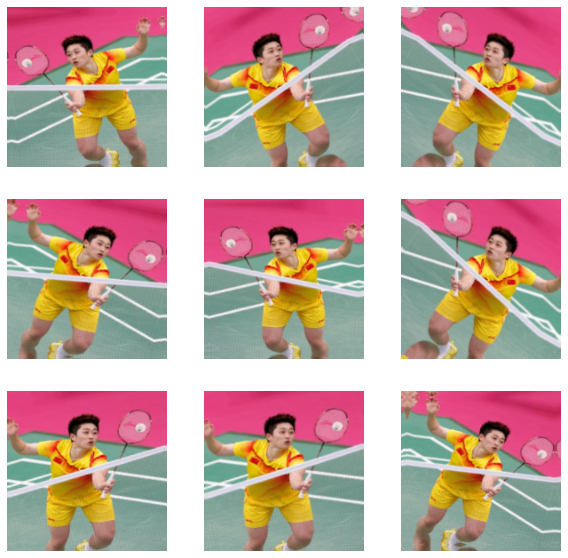

In [59]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

## Dropout
- Another technique to reduce overfitting is to introduce dropout regularization to the network.

- When you apply dropout to a layer, it randomly drops out (by setting the activation to zero) a number of output units from the layer during the training process. Dropout takes a fractional number as its input value, in the form such as 0.1, 0.2, 0.4, etc. This means dropping out 10%, 20% or 40% of the output units randomly from the applied layer.

- Let's create a new neural network with tf.keras.layers.Dropout before training it using the augmented images.

## Tuning the Model
- Creating some hyperparameters.
 1. Conv2D parameter is the numbers of filters that convolutional layers will learn from. It is an integer value and also determines the number of output filters in the convolution.

In [112]:
num_classes = len(class_names)

model_1 = Sequential([
  data_augmentation,
  # layers.Rescaling(1./255),
  # Hyperparameters of Conv2D
  # layers.Conv2D(filters=2, kernel_size=1, strides=(1, 1), padding="valid", activation=None,
       # input_shape=(img_height, img_width, 3)),
  # Hyperparameters of MaxPooling2D 
  # layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid"),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)])

In [113]:
model_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [114]:
model_1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_29 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 45, 45, 64)      

## Fitting the Model
- EarlyStopping is called to stop the epochs based on some metric (monitor) and conditions (mode, patience).
- It helps to avoid overfitting the model.
- We are telling the model to stop based on val_loss metric, we need it to be a minimum.
- (patience) says that after a minimum val_loss is achieved during the next iterations if the val_loss increases in any of the 3 iterations then the the training will stop at that epoch.

In [115]:
# from sklearn.utils.class_weight import compute_class_weight
# weights = compute_class_weight('balanced', classes=np.unique(train.classes), y=train.classes)
# cw = dict(zip(np.unique(train.classes), weights))
# print(cw)

In [116]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.callbacks import ReduceLROnPlateau

early = EarlyStopping(monitor='val_loss', mode='min', patience=3)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)
callbacks_list = [early, learning_rate_reduction]

In [117]:
epochs = 4
history = model_1.fit(normalized_ds,
                    validation_data=val_ds,
                    epochs=epochs,
                    callbacks=callbacks_list)

Epoch 1/4
120/120 [==============================] - 37s 305ms/step - loss: 1.5543 - accuracy: 0.4083 - val_loss: 206.1171 - val_accuracy: 0.4696 - lr: 0.0010
Epoch 2/4
120/120 [==============================] - 37s 308ms/step - loss: 1.0439 - accuracy: 0.6362 - val_loss: 188.1223 - val_accuracy: 0.5723 - lr: 0.0010
Epoch 3/4
120/120 [==============================] - 37s 307ms/step - loss: 0.8792 - accuracy: 0.6954 - val_loss: 167.5150 - val_accuracy: 0.6499 - lr: 0.0010
Epoch 4/4
120/120 [==============================] - 37s 305ms/step - loss: 0.8002 - accuracy: 0.7313 - val_loss: 325.6789 - val_accuracy: 0.5262 - lr: 0.0010


In [118]:
initial_epochs = 4
loss0, accuracy0 = model_1.evaluate(val_ds)

30/30 [==============================] - 2s 61ms/step - loss: 325.6789 - accuracy: 0.5262


In [119]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 325.68
initial accuracy: 0.53


## Visualize Final Model Results
- The plots show that training accuracy and validation accuracy are off by large margins...again.
- The model only achieved only around 65% accuracy on the validation set and then plummeted.
- More fine tuning for the model will be necessary to make this model better.

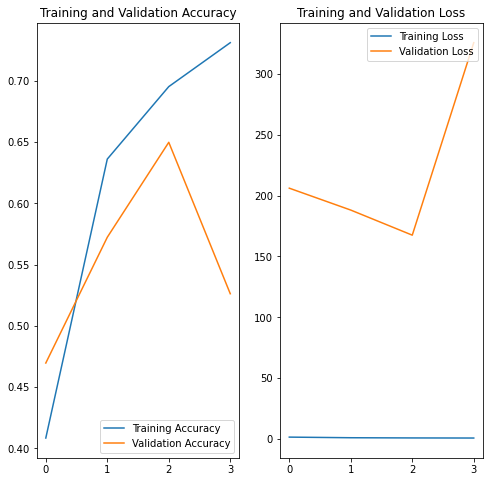

In [120]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [124]:
# img = tf.keras.utils.load_img(
#     "data_1/basketball/00000012.JPG", target_size=(img_height, img_width)
# )
# img_array = tf.keras.utils.img_to_array(img)
# img_array = tf.expand_dims(img_array, 0) # Create a batch

# predictions = model.predict(img_array)
# score = tf.nn.softmax(predictions[0])

# print(
#     "This image most likely belongs to {} with a {:.2f} percent confidence."
#     .format(class_names[np.argmax(score)], 100 * np.max(score))
# )

## Evaluating a Random Image
- I pulled an image of a baseball player to see if it would be predicted correctly.
- The model did a phenomenal job at predicting the image.
 - The model had 100% confidence in predicting the right sport for the image. This is excellent.

In [127]:
img = tf.keras.utils.load_img(
    "data_1/Phase5Images/merlin_176084667_69b1099b-0b7e-41ce-bfdf-e407899f10dc-superJumbo.jpeg", target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to baseball with a 100.00 percent confidence.


## Evaluation
The final model upon inspection performed satisfactory. The way it was evaluated was with an accuracy score. An accuracy score in this instance is a metric that explains how well the model did at predicting each class of image. The score is the fraction of predictions my model got right. The actual accuracy score in this case is a 72%. This tells me that 72/100 times I am identifying the right class of image. I also tested a random sample from the internet to see if the model could identify the class. The model tested the image and with 100% confidence it identified the image as baseball. The image was indeed baseball so the model performed well.

## Final Model
- This model might not be achieved right away. I may come back later and make it better.
- For this model I will try and simplify things.
- The reason behind this is because it seems the more the parameters have been tuned the worse the accuracy results became. 
- Let's just see what we can do to improve the accuracy score.